#### Trabajo semanal 12 - Síntesis de cuadripolos simplemente cargados

1) Dada la siguiente transferencia de tensiones:

<center><img src="image91.png"></center>

$$T(s)=\frac{V2}{Vg}=\frac{k.s.(s^2+1/16)}{s^3+2.s^2+2.s+1}$$

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transferencia de tension indicada, cargando a la entrada con una impedancia como se muestra en la figura.

b) Verificar la transferencia de tension del circuito obtenido.
c) Hallar el valor de k que cumple con la síntesis y valor de los componentes hallados.


2) Dada la siguiente transferencia de impedancia:

<center><img src="image92.png"></center>

$$T(s)=\frac{V2}{I1}=\frac{k.(s^2+9)}{s^3+2.s^2+2.s+1}$$

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transimpedancia indicada, cargado a la salida con una impedancia como se muestra en la figura.

b) Verificar la transimpedancia del circuito obtenido.

c) Hallar el valor de k que cumple con la síntesis y valor de los componentes hallados.

In [272]:
import sympy as sp
from schemdraw import Drawing
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import analyze_sys
from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_polo_infinito
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_serie, dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_espaciador, dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Resolución simbólica
s = sp.symbols('s', complex=True)

### Ej1

## Remociones

<img src="image93.png">

In [273]:
# Sea la siguiente función de excitación
ZZ = (s*(s**2+2))/(2*s**2+1)

print_latex(a_equal_b_latex_s('Z(s)', ZZ))

<IPython.core.display.Math object>

In [274]:
Y, k0 = remover_polo_dc(1/ZZ, omega_zero=sp.Rational(1,4), isSigma=False)

print_latex(a_equal_b_latex_s('Yt_1(s)', k0))
print_latex(a_equal_b_latex_s('Y_1(s)', Y))

L1 = k0.subs(s, 1)**(-1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [275]:
Z, kk, L2, C2 = remover_polo_jw(1/Y, omega=sp.Rational(1,4), isImpedance=True)

print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Z_2(s)', Z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [276]:
Y, k0 = remover_polo_dc(1/Z, isSigma=False)

print_latex(a_equal_b_latex_s('Yt_1(s)', k0))
print_latex(a_equal_b_latex_s('Y_1(s)', Y))

L3 = k0.subs(s, 1)**(-1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Circuito

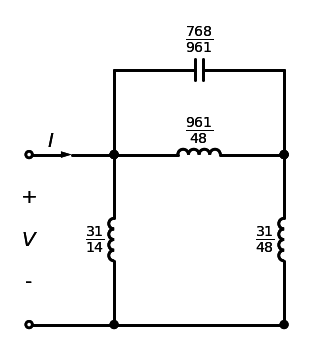

In [277]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_derivacion(d, 'L', L1)

d = dibujar_tanque_serie(d, L2, C2)

d = dibujar_elemento_derivacion(d, 'L', L3)

display(d)

## Verificacion

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

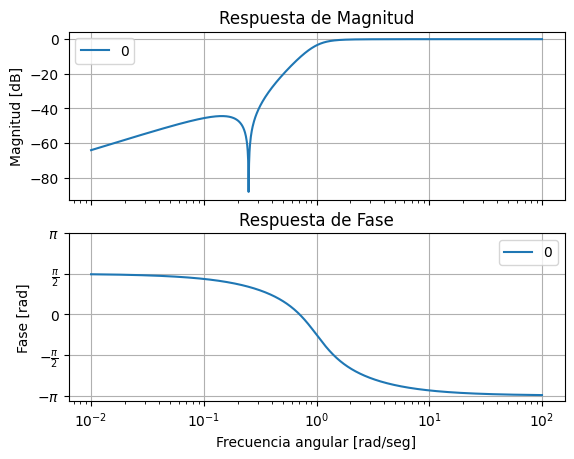

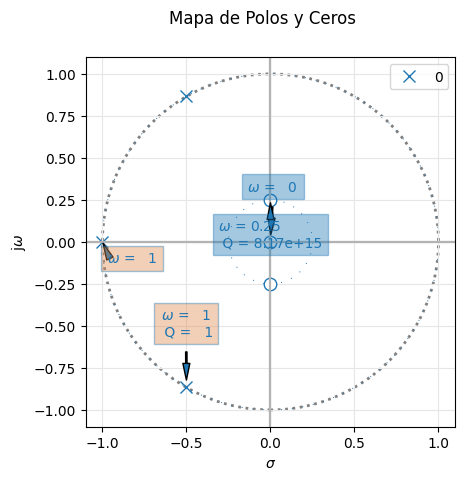

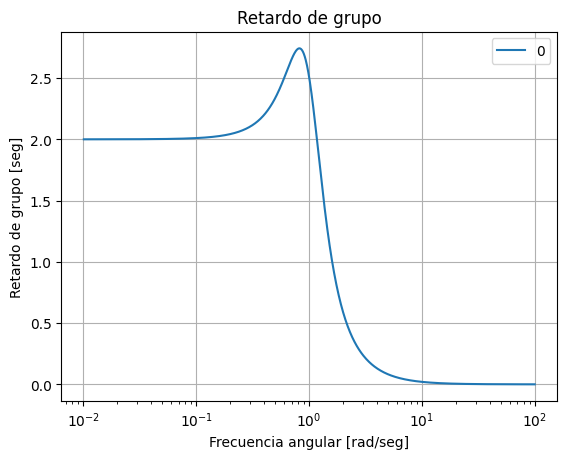

In [278]:
YA = 1/(s*L1)
YB = 1/(s*L2) + s*C2
YC = 1/(s*L3)

Y = sp.Matrix([[YA+YB, -YB],[-YB, YB + YC]])

det = Y.det()

Z11 = sp.factor(sp.simplify(Y[1,1]/det))
Z21 = sp.factor(sp.simplify(-Y[0,1]/det))

H = sig.TransferFunction( [1, 0, 1/16, 0], [1, 2, 2, 1] )

analyze_sys(H)

print_latex(a_equal_b_latex_s('Z_{11}(s)', Z11))
print_latex(a_equal_b_latex_s('Z_{21}(s)', Z21))
print_latex(a_equal_b_latex_s('\\frac{V_2}{V_1}(s)', sp.factor(Z21/(1+Z11))))


### Ej2

## Remociones

<img src="image94.png">

In [279]:
# Sea la siguiente función de excitación
ZZ = (2*s**2+1)/((s**2+2)*s)

print_latex(a_equal_b_latex_s('Z(s)', ZZ))

<IPython.core.display.Math object>

In [280]:
Y, Yt = remover_polo_infinito(1/ZZ, omega_zero=3, isSigma=False)

print_latex(a_equal_b_latex_s('Yt(s)', Yt))
print_latex(a_equal_b_latex_s('Y(s)', Y))

C1 = Yt.subs(s,1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [281]:
Z, kk, L2, C2 = remover_polo_jw(1/Y, omega=3, isImpedance=True)

print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Z_2(s)', Z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [282]:
Y, Yt = remover_polo_infinito(1/Z, isSigma=False)

print_latex(a_equal_b_latex_s('Yt_1(s)', Yt))
print_latex(a_equal_b_latex_s('Y_1(s)', Y))

C3 = Yt.subs(s,1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Circuito

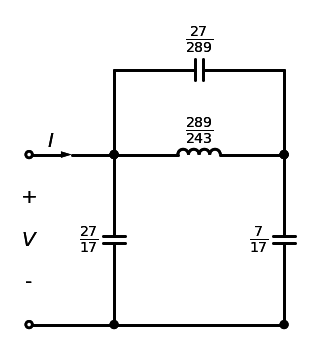

In [283]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_derivacion(d, 'C', C3)

d = dibujar_tanque_serie(d, L2, C2)

d = dibujar_elemento_derivacion(d, 'C', C1)

display(d)

## Verificacion

In [284]:
YA = s*C3
YB = 1/(s*L2) + s*C2
YC = s*C1

Y = sp.Matrix([[YA+YB, -YB],[-YB, YB + YC]])

det = Y.det()

Z22 = sp.factor(sp.simplify(Y[0,0]/det))
Z21 = sp.factor(sp.simplify(-Y[0,1]/det))

print_latex(a_equal_b_latex_s('Z_{21}(s)', Z21))
print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))
print_latex(a_equal_b_latex_s('\\frac{V_2}{I_1}(s)', sp.factor(Z21/(1+Z22))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>